In [173]:
import numpy as np
import matplotlib.pyplot as plt

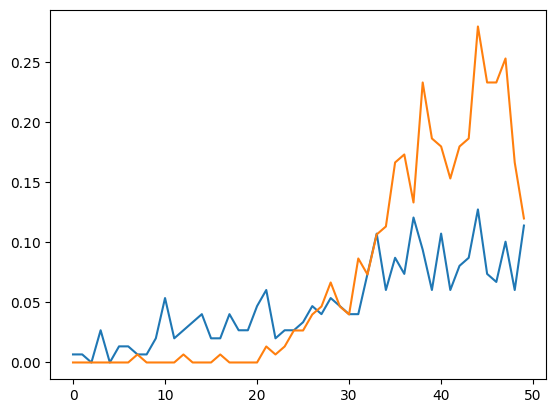

In [180]:
f = open("tmp.dat", "r")
data = []
t = 0
for l in f:
    if len(l.split(" ")) == 4:
        try:
            n = np.int32(l.split(" ")[0])
            if n == 1:
                t += 1
            v = np.float32(l.split(" ")[1])
            b = np.int32(l.split(" ")[2])
            if b == 3:
                data.append([t, v])
        except:
            pass
f.close()
data = np.array(data)

all_n = np.int32(data[:,0])
before = []
after = []
for n in range(1,t):
    x = data[all_n == n][:,1]
    a, b = np.histogram(x, range=(0, 180), bins=50)
    b = (b[1:]+b[:-1])/2
    if n < 150:
        before.append(a)
    elif n > 150:
        after.append(a)
before = np.mean(before, axis=0)
after = np.mean(after, axis=0)

plt.plot(before, "-")
plt.plot(after, "-")
plt.show()

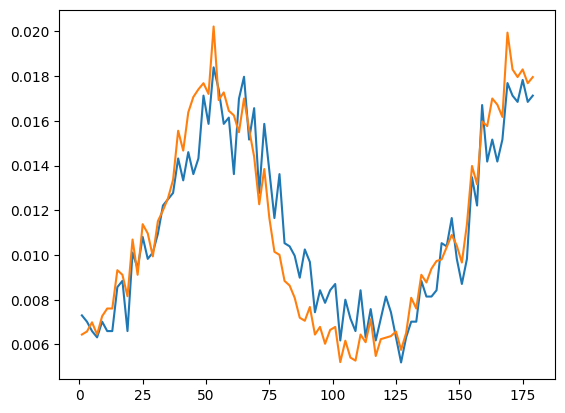

In [181]:
f = open("pull.dat", "r")
data = []
histogram = []
t = 0
for l in f:
    if len(l.split(" ")) == 6:
        try:
            time = np.int32(l.split(" ")[0])
            try:
                histogram = np.array(histogram)
                plt.plot(histogram[:,0], histogram[:,1], '-')
            except:
                pass
            histogram = []
        except:
            pass
    if len(l.split(" ")) == 4:
        Bin, Coord, Count, CountTotal = l.split(" ")
        Bin = np.int32(Bin)
        Coord = np.int32(Coord)
        Count = np.int32(Count)
        CountTotal = np.float32(CountTotal[:-1])
        histogram.append([Coord, CountTotal])
        #np.savetxt("histo"+str(time)+".dat", histogram)
histogram = np.array(histogram)
plt.plot(histogram[:,0], histogram[:,1], '-')